In [65]:
# Se requiere Python ≥ 3.5
import sys;
assert sys.version_info >= (3, 5);

# Se requiere Scikit-Learn ≥ 0.20
import sklearn;
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
assert sklearn.__version__ >= "0.20";

# Otros imports
import numpy as np;
import pandas as pd
from pandas.plotting import scatter_matrix
import os;
import matplotlib as mpl
import matplotlib.pyplot as plt;

# tamaño del texto en las etiquetas por defecto
mpl.rc('axes',  labelsize=14);
mpl.rc('xtick', labelsize=12);
mpl.rc('ytick', labelsize=12);

In [7]:
insurence_df = pd.read_csv("./dataset/insurance.csv")

In [5]:
insurence_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
insurence_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [89]:
copy = insurence_df.copy()
copy_cat = copy[["sex", "smoker", "region"]]
copy_cat

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [90]:
ordinal_encoder = OrdinalEncoder(dtype=np.int64)
cat_encoded = ordinal_encoder.fit_transform(copy_cat)
cat_encoded

array([[0, 1, 3],
       [1, 0, 2],
       [1, 0, 2],
       ...,
       [0, 0, 2],
       [0, 0, 3],
       [0, 1, 1]], dtype=int64)

In [91]:
copy[["sex","smoker","region"]] = cat_encoded
copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


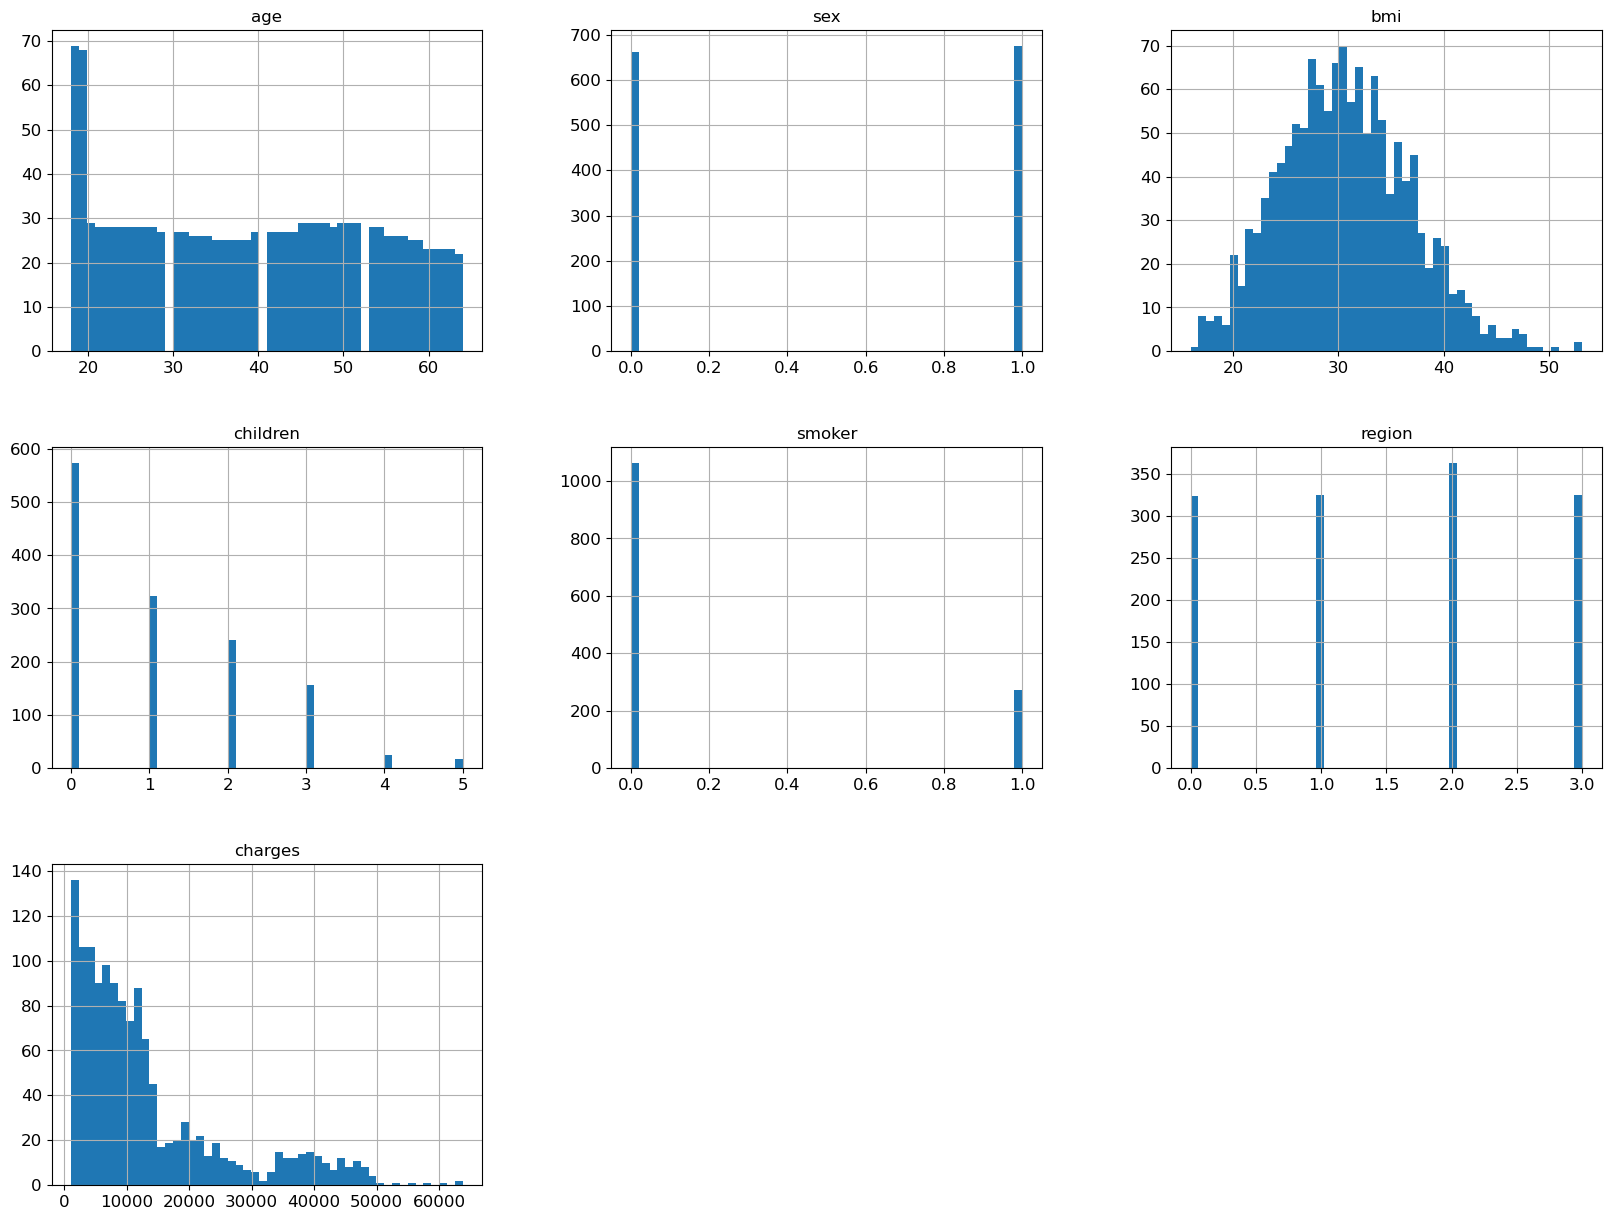

In [92]:
copy.hist(bins=50, figsize=(20,15));

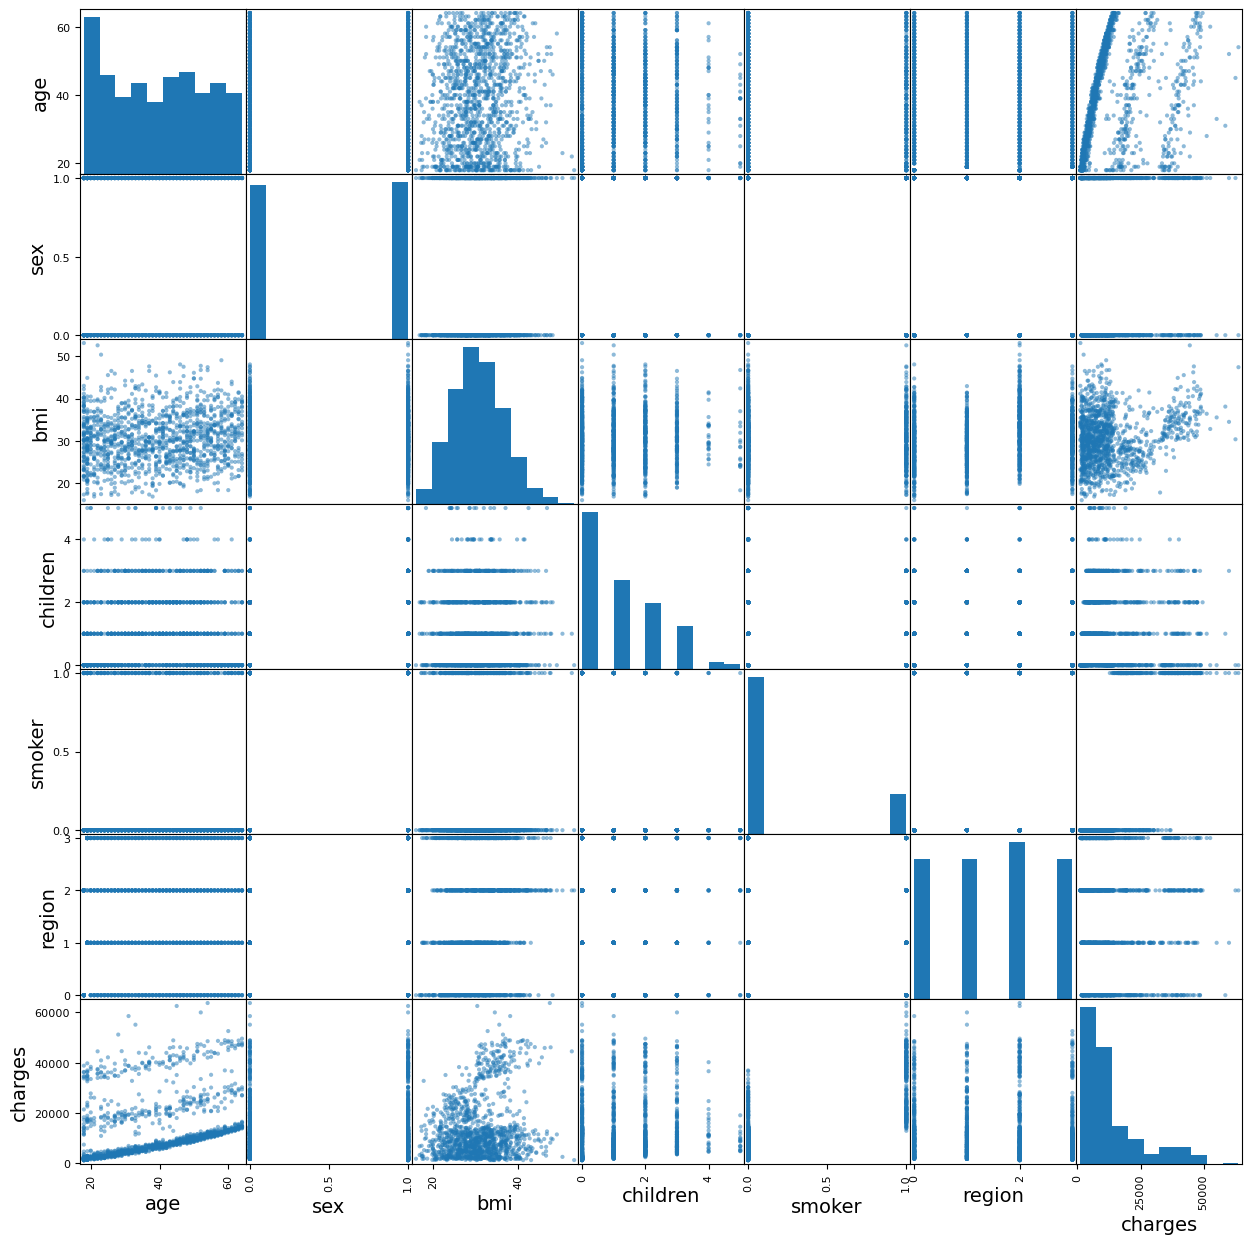

In [93]:
corr_matrix = copy.corr();
len(corr_matrix)
scatter_matrix(copy, figsize=(15, 15));

In [94]:
corr_matrix["charges"].sort_values(ascending=False)

charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
region     -0.006208
Name: charges, dtype: float64

In [106]:
copy["bmi_per_smoker"] = copy["bmi"] / copy["smoker"]
copy["smoker_per_sex"] = copy["smoker"] / copy["sex"]
copy["smoker_per_region"] = copy["smoker"] / copy["region"]
copy["children_per_age"] = copy["bmi"] / copy["age"]
corr_matrix = copy.corr();
corr_matrix["charges"].sort_values(ascending=False)

charges              1.000000
smoker_per_sex       0.816579
region_per_bmi       0.806481
bmi_per_smoker       0.806481
smoker               0.787251
smoker_per_region    0.697337
age                  0.299008
bmi                  0.198341
age_per_region       0.162337
children             0.067998
sex                  0.057292
region              -0.006208
children_per_age    -0.159730
Name: charges, dtype: float64

In [72]:
np.random.seed(42)
def split_train_test(data, test_ratio):
    test_set_size   = int(len(insurence_df)*test_ratio)
    shuffle_indices = np.random.permutation(len(data))
    test_indices    = shuffle_indices[:test_set_size]
    train_indices   = shuffle_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [73]:
X_train, X_test = split_train_test(insurence_df, 0.20)
len(X_train), len(X_test)

(1071, 267)